In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

# Dataset

In [2]:
# Set the seed so that the results are reproducible
np.random.seed(0)

# Number of data points
num = 100

# Generate 100 data points for square footage 
square_footage = np.random.normal(1500, 500, num)  # mean = 1500, std = 500

# Generate some noise
noise = np.random.normal(0, 50000, num)  # mean = 0, std = 50000

# Generate house prices, correlated with square footage
base_price = 50000  # minimum price
price_per_sqft = 100  # price increase per sqft
house_prices = base_price + square_footage * price_per_sqft + noise

# LMS Linear Regression: batch gradient descent 

y = 133.02x + 0.11


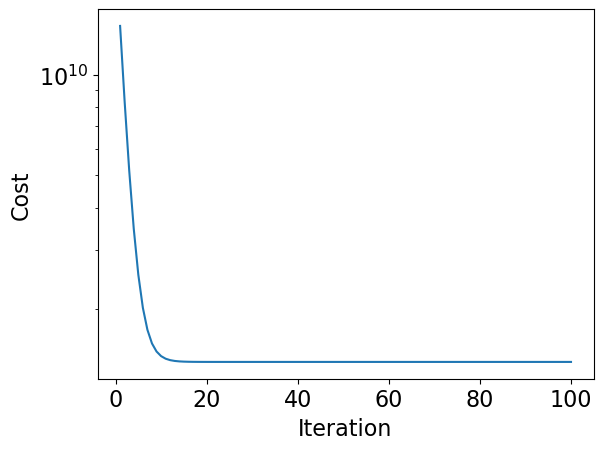

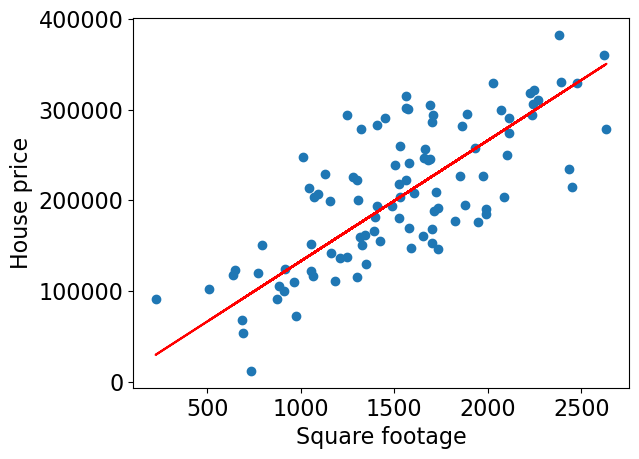

In [3]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    cost = np.sum(np.square(errors)) / (2 * m)
    return cost

def batch_gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta - sum_delta
        
        cost_history[i] = compute_cost(X, y, theta)  
    
    return theta, cost_history


# Construct the feature matrix X and the target vector y
X = np.column_stack((np.ones(len(square_footage)), square_footage))
y = house_prices

# Set hyperparameters
alpha = 0.0000001  # learning rate
iterations = 100  # number of iterations to run

# Initialize theta to [0, 0]
theta = np.zeros(2)

# Run gradient descent
theta_batch, cost_history = batch_gradient_descent(X, y, theta, alpha, iterations)

# Print the model parameters in the form y = mx + b
print('y = ' + str(round(theta_batch[1], 2)) + 'x + ' + str(round(theta_batch[0], 2)))

# Plot the loss over time
start_idx = 0
plt.semilogy(range(start_idx+1, iterations + 1), cost_history[start_idx:])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

# Plot the fitted model to the data
plt.scatter(square_footage, house_prices)
plt.xlabel('Square footage')
plt.ylabel('House price')
plt.plot(square_footage, theta_batch[0] + theta_batch[1] * square_footage, color='red')
plt.show()

# Stochastic gradient descent

y = 133.18x + 0.09


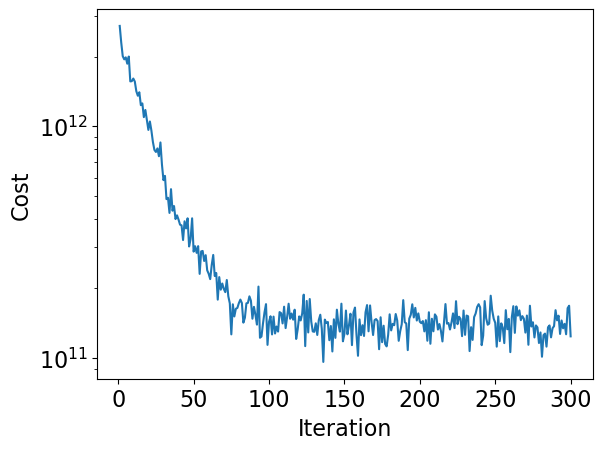

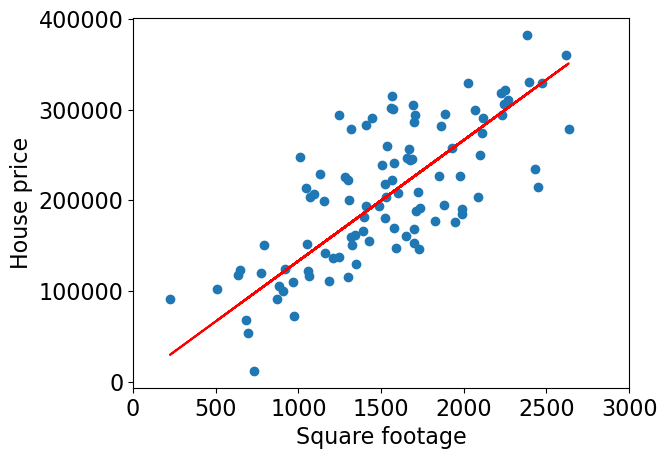

In [4]:
def stochastic_gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, theta)

            theta = theta - alpha * (X_i.T.dot((prediction - y_i)).flatten())
            cost += compute_cost(X_i, y_i, theta)
        cost_history[it]  = cost
        
    return theta, cost_history

# Set hyperparameters
alpha = 1e-10  # learning rate
iterations = 300  # number of iterations to run

# Initialize theta to [0, 0]
theta = np.zeros(2)

# Run gradient descent
theta_stochastic, cost_history = stochastic_gradient_descent(X, y, theta, alpha, iterations)

# Print the model parameters in the form y = mx + b
print('y = ' + str(round(theta_stochastic[1], 2)) + 'x + ' + str(round(theta_stochastic[0], 2)))

# Plot the loss over time
start_idx = 0
plt.semilogy(range(start_idx+1, iterations + 1), cost_history[start_idx:])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

# Plot the fitted model to the data
plt.scatter(square_footage, house_prices)
plt.xlabel('Square footage')
plt.ylabel('House price')
plt.plot(square_footage, theta_stochastic[0] + theta_stochastic[1] * square_footage, color='red')
plt.xlim(0, 3000)
plt.show()


## Stochastic gradient descent in pytorch

y = 109.68x + 39869.85


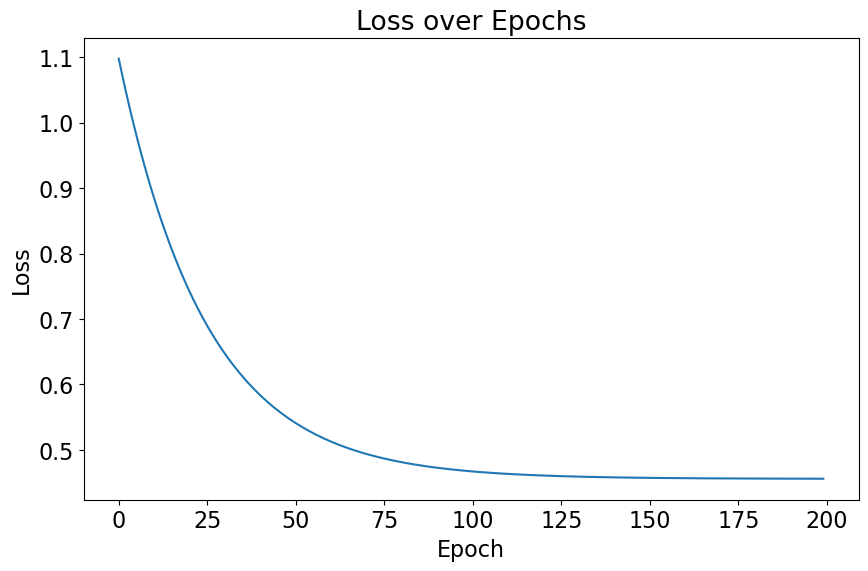

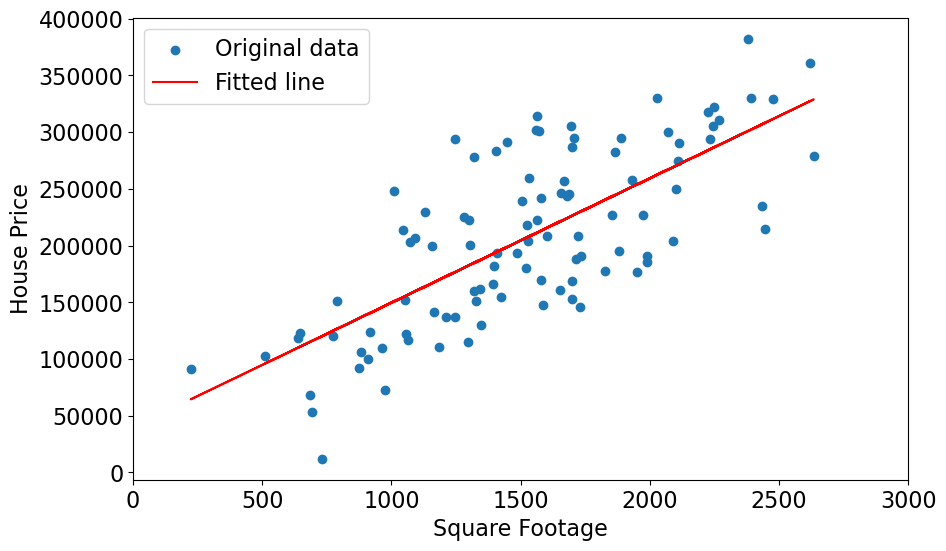

In [5]:
import torch
from torch import nn, optim
from sklearn.preprocessing import StandardScaler

# Preprocessing - standardizing the features for efficient training
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(square_footage.reshape(-1, 1))
y = scaler_y.fit_transform(house_prices.reshape(-1, 1))  

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Define a linear model
model = nn.Linear(1, 1)

# Define loss function (mean squared error) and optimizer (stochastic gradient descent)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  # set a smaller learning rate

# Training
num_epochs = 200  # set a larger number of epochs
losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Record the loss at each epoch
    losses.append(loss.item())

# Retrieve the learned parameters
learned_slope = model.weight.item()
learned_intercept = model.bias.item()

# Transform the learned parameters back to the original scale
real_slope = learned_slope * (scaler_y.scale_ / scaler_X.scale_)
real_intercept = learned_intercept * scaler_y.scale_ + scaler_y.mean_ - real_slope * scaler_X.mean_

# Print the model parameters in the form y = mx + b
print('y = ' + str(round(real_slope[0], 2)) + 'x + ' + str(round(real_intercept[0], 2)))

# Plotting the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

# Making predictions
X_numpy = scaler_X.inverse_transform(X.detach().numpy())  # convert back from standardized square footage
predictions = scaler_y.inverse_transform(model(X).detach().numpy())  # scale back up prices

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_numpy, scaler_y.inverse_transform(y.detach().numpy()), label='Original data')  # scale back up prices
plt.plot(X_numpy, predictions, label='Fitted line', color='r')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.xlim(0, 3000)
plt.legend()
plt.show()

# Exact solution

y = 111.47x + 36552.89


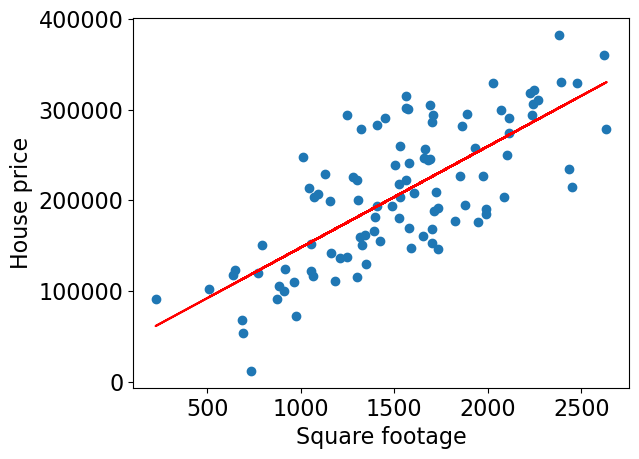

In [6]:
# Create the feature matrix X and target vector y
X = np.vstack((np.ones(len(square_footage)), square_footage)).T  # add a column of ones for the bias term
y = house_prices

# Compute theta using the normal equations
theta_exact = np.linalg.inv(X.T @ X) @ X.T @ y

# The bias (intercept) is the first element of theta, and the slope is the second element
intercept_exact, slope_exact = theta_exact

# Print the model parameters in the form y = mx + b
print('y = ' + str(round(slope_exact, 2)) + 'x + ' + str(round(intercept_exact, 2)))

# Plot the fitted model to the data
plt.scatter(square_footage, house_prices)
plt.xlabel('Square footage')
plt.ylabel('House price')
plt.plot(square_footage, intercept_exact + slope_exact * square_footage, color='red')
plt.show()

# Compare the solutions

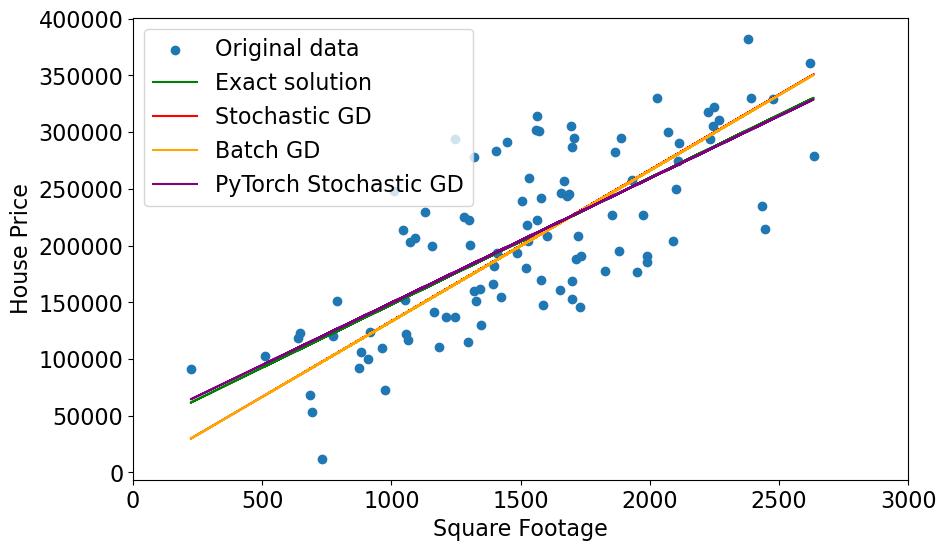

In [8]:
# Plot a comparison of all 4 solutions
plt.figure(figsize=(10, 6))
plt.scatter(square_footage, house_prices, label='Original data')
plt.plot(square_footage, intercept_exact + slope_exact * square_footage, color='green', label='Exact solution')
plt.plot(square_footage, theta_stochastic[0] + theta_stochastic[1] * square_footage, color='red', label='Stochastic GD')
plt.plot(square_footage, theta_batch[0] + theta_batch[1] * square_footage, color='orange', label='Batch GD')
plt.plot(X_numpy, predictions, color='purple', label='PyTorch Stochastic GD')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.xlim(0, 3000)
plt.legend()
plt.show()